In [1]:
import numpy as np
import skimage as ski
import skimage.io
import matplotlib.pyplot as plt
import tensorflow as tf

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(386, 439, 3)


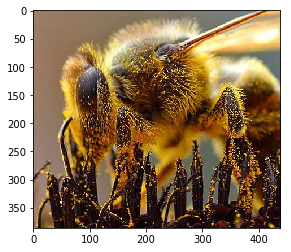

In [7]:
img = (ski.io.imread("https://upload.wikimedia.org/wikipedia/commons/4/4d/Bees_Collecting_Pollen_cropped.jpg")/255.0)
img = img.astype(np.float32)
plt.imshow(img, cmap="gray")
print(img.shape)

In [ ]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

#convolution = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2], padding="SAME")
"""
X is the input mini-batch (a 4D tensor, as explained earlier).

filters is the set of filters to apply (also a 4D tensor, as explained earlier).

strides is a four-element 1D array, where the two central elements are the vertical 
and horizontal strides (sh and sw). The first and last elements must currently be equal to 1. 
They may one day be used to specify a batch stride (to skip some instances) and a channel stride
(to skip some of the previous layer’s feature maps or channels).

padding must be either "VALID" or "SAME":

If set to "VALID", the convolutional layer does not use zero padding, 
and may ignore some rows and columns at the bottom and right of the input image, 
depending on the stride, as shown in Figure 13-7 (for simplicity, only the horizontal 
dimension is shown here, but of course the same logic applies to the vertical dimension).

If set to "SAME", the convolutional layer uses zero padding if necessary. In this case, 
the number of output neurons is equal to the number of input neurons divided by the stride, 
rounded up (in this example, ceil (13 / 5) = 3).
Then zeros are added as evenly as possible around the inputs.
"""

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

for i in range(2):
    for j in range(2):
        plt.subplot(2, 2,i * 2 + j + 1)
        plt.imshow(output[i, :, :, j], cmap="gray") # plot 1st image's 2nd feature map

In [8]:
img.dtype

dtype('float32')

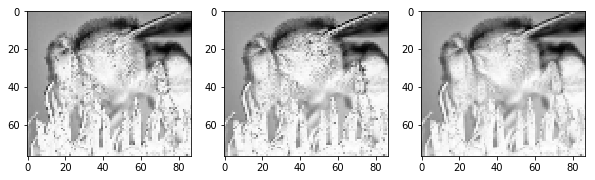

In [9]:
num_filters = 3
channels = 3
shape = [1] + list(img.shape)

X = tf.constant(img.reshape(shape))

filters = np.zeros(shape=(5, 5, channels, num_filters), dtype=np.float32)
filters[:, 2, :, 0] = 1  # vertical line
filters[2, :, :, 1] = 1  # horizontal line
filters[:, :, :, 2] = 1

X = tf.nn.conv2d(X, filters, strides=[1,5,5,1], padding="VALID")

with tf.Session() as sess:
    out = sess.run(X)[0]

    fig, _ = plt.subplots(1, num_filters, figsize = (10, 8))
    for i, ax in enumerate(fig.axes):
        ax.imshow(out[:, :, i], cmap="Greys")

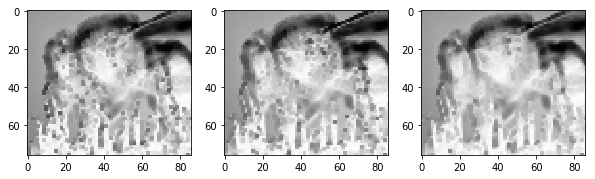

In [10]:
num_filters = 3
shape = [1] + list(img.shape)

X = tf.constant(img.reshape(shape))

filters = np.zeros(shape=(5, 5, 3, num_filters), dtype=np.float32)
filters[:, 2, :, 0] = 1  # vertical line
filters[2, :, :, 1] = 1  # horizontal line
filters[:, :, :, 2] = 1

X = tf.nn.conv2d(X, filters, strides=[1,5,5,1], padding="VALID")
X = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,1,1,1],padding="VALID")

with tf.Session() as sess:
    out = sess.run(X)[0]

    fig, _ = plt.subplots(1, num_filters, figsize = (10, 8))
    for i, ax in enumerate(fig.axes):
        ax.imshow(out[:, :, i], cmap="Greys")